In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./DataSets/India Agriculture Crop Production.csv')

In [5]:
df.head(2)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803


In [6]:
df.shape

(345407, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [8]:
df.corr()

,Area,Production,Yield
Area,1.000000,0.048521,0.000426
Production,0.048521,1.000000,0.437400
Yield,0.000426,0.437400,1.000000


In [9]:
df.cov()

,Area,Production,Yield
Area,2.101161e+09,4.818441e+10,1.790628e+04
Production,4.818441e+10,4.635347e+14,8.694229e+09
Yield,1.790628e+04,8.694229e+09,8.402083e+05


In [11]:
df.isnull().sum()/len(df)*100 #around 1% missing data in the Production Units

State               0.000000
District            0.000000
Crop                0.009264
Year                0.000000
Season              0.000290
Area                0.009554
Area Units          0.000000
Production          1.445541
Production Units    0.000000
Yield               0.009554
dtype: float64

<AxesSubplot:>

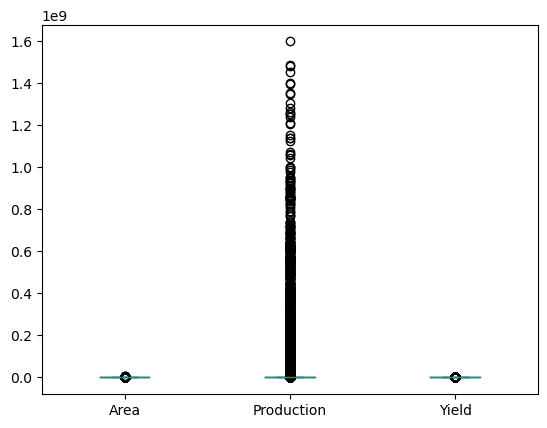

In [12]:
df.plot(kind='box') # there are outliers in Area, Production and Yield, but more number of outliers in the production.

In [13]:
# categorical data

In [14]:
df.info() #there are 7 categorical variables. 'State, District, Crop, Year, Season, Area Units, Production Units'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [ ]:
# lets treat the missing values first

In [15]:
# There are missing values in 'Crop', 'Season', 'Area', 'Production', 'Yield'

In [41]:
df['Crop'].mode()
df['Season'].mode()
df['Area'].median()
df['Production'].median()
df['Yield'].median()

1.0

In [29]:
df['Crop'].fillna('Rice', inplace=True)

In [32]:
df['Season'].fillna('Kharif', inplace=True)

In [35]:
df['Area'].fillna(532.0, inplace=True)

In [38]:
df['Production'].fillna(717.0, inplace=True)

In [42]:
df['Yield'].fillna(1.0, inplace=True)

In [43]:
df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [ ]:
# Lets handle the categorical variables

In [46]:
# separting the cat and num variables

cat = df.select_dtypes(include='object')
num = df.select_dtypes(include=np.number)

In [49]:
# for i in cat.columns:
#     print(cat.value_counts())
#     print('\n\n')

In [52]:
cat['State'].value_counts(normalize=True)

Uttar Pradesh                  0.129647
Madhya Pradesh                 0.086582
Karnataka                      0.079596
Bihar                          0.071501
Rajasthan                      0.058954
Tamil Nadu                     0.053632
Assam                          0.052651
Maharashtra                    0.051887
Andhra Pradesh                 0.047373
Odisha                         0.046765
Chhattisgarh                   0.044252
Gujarat                        0.040685
West Bengal                    0.036467
Haryana                        0.024044
Uttarakhand                    0.019403
Nagaland                       0.016433
Himachal Pradesh               0.014600
Jharkhand                      0.014487
Kerala                         0.014099
Telangana                      0.013619
Jammu and Kashmir              0.012588
Arunachal Pradesh              0.012579
Meghalaya                      0.012513
Punjab                         0.011992
Manipur                        0.009033


In [55]:
cat

,State,District,Crop,Year,Season,Area Units,Production Units
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,Hectare,Tonnes
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,Hectare,Tonnes
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,Hectare,Tonnes
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,Hectare,Tonnes
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,Hectare,Tonnes
...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,Rice,2019-20,Rabi,Hectare,Tonnes
345403,Manipur,SENAPATI,Rice,2019-20,Rabi,Hectare,Tonnes
345404,Manipur,TAMENGLONG,Rice,2019-20,Rabi,Hectare,Tonnes
345405,Manipur,THOUBAL,Rice,2019-20,Rabi,Hectare,Tonnes


In [ ]:
# We are doing Label-Encoding 

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
df['State'] = le.fit_transform(df['State'])

In [61]:
df['District'] = le.fit_transform(df['District'])
df['Crop'] = le.fit_transform(df['District'])
df['Year'] = le.fit_transform(df['Year'])
df['Season'] = le.fit_transform(df['Season'])
df['Area Units'] = le.fit_transform(df['Area Units'])
df['Production Units'] = le.fit_transform(df['Production Units'])

In [62]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,0,481,481,4,1,1254.0,0,2061.0,2,1.643541
1,0,481,481,5,4,1258.0,0,2083.0,2,1.655803
2,0,481,481,6,4,1261.0,0,1525.0,2,1.209358
3,0,485,485,4,1,3100.0,0,5239.0,2,1.690000
4,0,627,627,5,4,3105.0,0,5267.0,2,1.696296


In [ ]:
# We first build the linearRegression model

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [65]:
lr = LinearRegression()

In [67]:
X = df.drop('Yield', axis=1)
y = df['Yield']

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=10)

In [71]:
lr_model = lr.fit(xtrain, ytrain)

In [74]:
# train predict
train_pred = lr_model.predict(xtrain)


In [75]:
# test predict
test_pred = lr_model.predict(xtest)

In [78]:
# train accuracy
r2_score(ytrain, train_pred)

0.22714321559134776

In [77]:
# test accuracy
r2_score(ytest, test_pred)

0.24843477561461358